<a href="https://colab.research.google.com/github/kalebsampaco/Ejercicios-en-google-colab/blob/master/redes_recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
 - 0s - loss: 0.0465
Epoch 2/100
 - 0s - loss: 0.0092
Epoch 3/100
 - 0s - loss: 0.0075
Epoch 4/100
 - 0s - loss: 0.0066
Epoch 5/100
 - 0s - loss: 0.0059
Epoch 6/100
 - 0s - loss: 0.0054
Epoch 7/100
 - 0s - loss: 0.0051
Epoch 8/100
 - 0s - loss: 0.0049
Epoch 9/100
 - 0s - loss: 0.0045
Epoch 10/100
 - 0s - loss: 0.0045
Epoch 11/100
 - 0s - loss: 0.0041
Epoch 12/100
 - 0s - loss: 0.0040
Epoch 13/100
 - 0s - loss: 0.0038
Epoch 14/100
 - 0s - loss: 0.0037
Epoch 15/100
 - 0s - loss: 0.0035
Epoch 16/100
 - 0s - loss: 0.0036
Epoch 17/100
 - 0s - loss: 0.0032
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0030
Epoch 21/100
 - 0s - loss: 0.0029
Epoch 22/100
 - 0s - loss: 0.0030
Epoch 23/100
 - 0s - loss: 0.0026
Epoch 24/100
 - 0s - loss: 0.0027
Epoch 25/100
 - 0s - loss: 0.0025
Epoch 26/100
 - 0s - loss: 0.0024
Epoch 27/100
 - 0s - loss: 0.0023
Epoch 28/100
 - 0s - loss: 0.0024
Epoch 29/100
 - 0s - loss: 0.0024
Epoch 30/100
 - 0s - lo

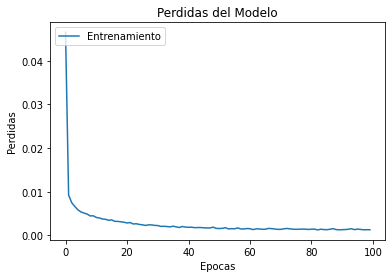

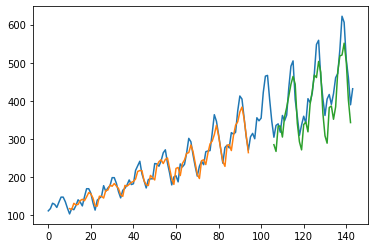

In [4]:
import tensorflow as tf
import numpy as np
import keras
import math
from pandas import read_csv
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input,Conv3D,BatchNormalization,ConvLSTM2D,LSTM,GRU
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.preprocessing import image
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Conversion Array-Matriz
def create_base_datos(datos, mirar_atras=1):
	datosX, datosY = [], []
	for i in range(len(datos)-mirar_atras-1):
		a = datos[i:(i+mirar_atras), 0]
		datosX.append(a)
		datosY.append(datos[i + mirar_atras, 0])
	return np.array(datosX), np.array(datosY)


#Cargar Datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
datos = dataframe.values
datos = datos.astype('float32')

#Normalizacion de Datos
escalado = MinMaxScaler(feature_range=(0, 1))
datos = escalado.fit_transform(datos)

#Division en Train/Test
tsize = int(len(datos) * 0.67)
testsize = len(datos) - tsize
entrenamiento, test = datos[0:tsize,:], datos[tsize:len(datos),:]

# Cambio de tamaños de train y test
mirar_atras= 10
tX, tY = create_base_datos(entrenamiento, mirar_atras)
testX, testY = create_base_datos(test, mirar_atras)
tX = np.reshape(tX, (tX.shape[0], 1, tX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Creacion de Red con LSTM
input=Input(shape=(1,mirar_atras))
x=LSTM(10)(input)
#x=GRU(10)(input)
x=Dense(1)(x)
model=Model(inputs=input,outputs=x)
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(tX, tY, epochs=100, batch_size=1, verbose=2)

plt.figure(1)
plt.plot(history.history['loss'])
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento'], loc='upper left')


# Realizacion de predicciones
prediciones_entrenamiento = model.predict(tX)
prediciones_test = model.predict(testX)

# Inversion de las predicciones para calcular su error
prediciones_entrenamiento = escalado.inverse_transform(prediciones_entrenamiento)
tY = escalado.inverse_transform([tY])
prediciones_test = escalado.inverse_transform(prediciones_test)
testY = escalado.inverse_transform([testY])

# Calculo de la raiz del error cuadratico medio o RMSE
Puntuacion_Train = math.sqrt(mean_squared_error(tY[0,:], prediciones_entrenamiento[:,0]))
Puntuacion_Test = math.sqrt(mean_squared_error(testY[0], prediciones_test[:,0]))
print('Puntuacion Train: %.2f RMSE  y Puntuacion Test: %.2f RMSE' % (Puntuacion_Train,Puntuacion_Test))


# Desplazamiento de predicciones de entrenamiento
plot_prediccion_entrenamiento = np.empty_like(datos)
plot_prediccion_entrenamiento[:, :] = np.nan
plot_prediccion_entrenamiento[mirar_atras:len(prediciones_entrenamiento)+mirar_atras, :] = prediciones_entrenamiento

# Desplazamiento de predicciones de test
plot_prediccion_test = np.empty_like(datos)
plot_prediccion_test[:, :] = np.nan
plot_prediccion_test[len(prediciones_entrenamiento)+(mirar_atras*2)+1:len(datos)-1, :] = prediciones_test

# Mostrar predicciones y datos
plt.figure(2)
plt.plot(escalado.inverse_transform(datos))
plt.plot(plot_prediccion_entrenamiento)
plt.plot(plot_prediccion_test)
plt.show()
